## Support Vector Machines

In [1]:
import os
import scipy as sp
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
dataset_1 = loadmat('/home/johan/repos/GitHub/ML_Coursera-Stanford/6. Support Vector Machines/ex6/ex6data1.mat')
dataset_2 = loadmat('/home/johan/repos/GitHub/ML_Coursera-Stanford/6. Support Vector Machines/ex6/ex6data2.mat')
dataset_3 = loadmat('/home/johan/repos/GitHub/ML_Coursera-Stanford/6. Support Vector Machines/ex6/ex6data3.mat')

In [3]:
X_1 = dataset_1['X']
print ('X_1:\n',X_1[0:3])
print ('dataset_1[y]:\n',dataset_1['y'][0:3])
y_1 = dataset_1['y'].reshape(-1)
print ('reshape(-1):\n',y_1[0:3])

X_1:
 [[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]]
dataset_1[y]:
 [[1]
 [1]
 [1]]
reshape(-1):
 [1 1 1]


I will begin by with a 2D example dataset which can be separated by a
linear boundary. Notice that there is an outlier positive example + on
the far left, this outlier affects the SVM decision boundary.  
I will try using different values of the C
parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role
similar to 1/λ , where λ is the regularization parameter that I was using
previously for logistic regression.

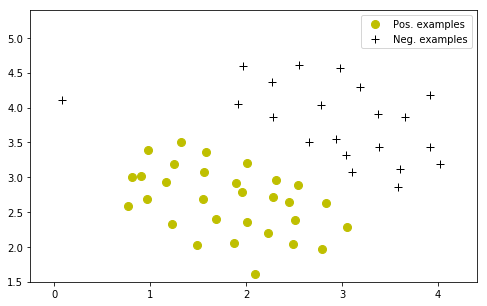

In [4]:
plt.figure(figsize=(8,5))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.25, 4.4)
plt.ylim(1.5, 5.4)
plt.legend(numpoints = 1, loc = 1)
plt.show()

In [5]:
#Penalty parameter C of the error term.
clf = SVC(C=1, kernel='linear')
clf.fit(X_1, y_1)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
print('support_vectors:\n',clf.support_vectors_,len(clf.support_vectors_))
print('support_vectors_Index:\n',clf.support_,len(clf.support_))
print('support_vectors_n-support:\n',clf.n_support_)

support_vectors:
 [[1.5841   3.3575  ]
 [2.0103   3.2039  ]
 [2.3099   2.9584  ]
 [2.8283   2.6309  ]
 [1.3191   3.5109  ]
 [2.5403   2.8867  ]
 [3.5772   2.856   ]
 [3.1048   3.0709  ]
 [1.9182   4.0534  ]
 [2.6555   3.5008  ]
 [3.0357   3.3165  ]
 [0.086405 4.1045  ]] 12
support_vectors_Index:
 [20 21 24 25 42 47  4 11 12 14 19 50] 12
support_vectors_n-support:
 [6 6]


$$ W_0x+W_1y+Intercept=0$$
$$ W_1y=-W_0x-Intercept$$  
$$ y=\frac{-W_0x-Intercept}{W_1}$$  



In [7]:
xs = sp.linspace(-1, 8)
# Calculate the decision boundary
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1
# Store support vectors
svs = clf.support_vectors_

In [8]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
margin_low  = db_1 - np.sqrt(1 + a ** 2) * margin
margin_high = db_1 + np.sqrt(1 + a ** 2) * margin

Line's equation is called the slope-intercept form, because k can be interpreted as the y-intercept of the line, that is, the y-coordinate where the line intersects the y-axis.
If the slope m of a line and a point (x1,y1) on the line are both known, then the equation of the line can be found using the point-slope formula:


$$ y-y_1 = m(x-x_1)$$  
$$ y = m(x-x_1) + y_1$$




In [9]:
# Calculate margins
c = svs[0]
print(c)
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
print(c[0])
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]
print(c)

[1.5841 3.3575]
1.5841
[3.0357 3.3165]


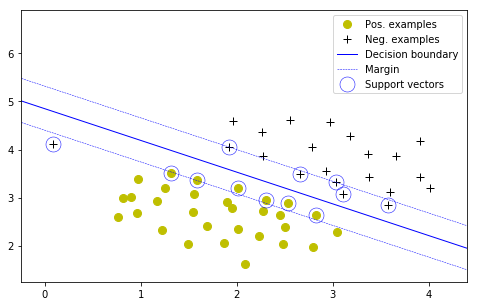

In [10]:
plt.figure(figsize=(8,5))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 6.9)
plt.legend(numpoints = 1, loc = 1)
plt.show()

In [11]:
clf = SVC(C=100, kernel='linear')
clf.fit(X_1, y_1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
xs = sp.linspace(-1, 8)

# Calculate the decision boundary
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1

# Store support vectors
svs = clf.support_vectors_

In [13]:
# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

In [14]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
margin_low  = db_1 - np.sqrt(1 + a ** 2) * margin
margin_high = db_1 + np.sqrt(1 + a ** 2) * margin

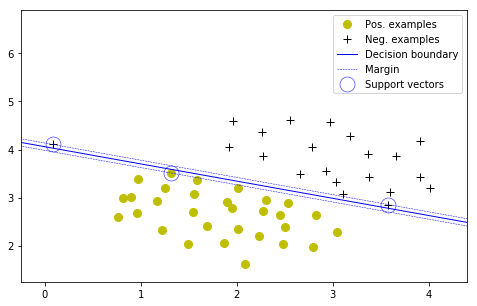

In [15]:
plt.figure(figsize=(8,5))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 6.9)
plt.legend(numpoints = 1, loc = 1)
plt.show()

## SVM with Gaussian Kernels

I will be using SVMs to do non-linear classification. In particular, I will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.  

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the **Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
(x(i) , x(j) ). The Gaussian kernel is also parameterized by a bandwidth parameter**, σ, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

$$K_{gaussian}(x^{(i)},x^{(j)}) = exp\bigg(-\frac{||x^{(i)},x^{(j)}||^2}{2\sigma²}\bigg)$$  

$$K_{gaussian}(x^{(i)},x^{(j)}) = exp\Bigg(-\frac{{\sum\limits_{k=1}^n}||x_{k}^{(i)},x_{k}^{(j)}||^2}{2\sigma^2}\Bigg)$$  


In [16]:
X_2 = dataset_2['X']
print('X_2:\n',X_2[0:3])
y_2 = dataset_2['y'].reshape(-1)
print ('reshape(-1):\n',y_2[0:3])

X_2:
 [[0.107143  0.60307  ]
 [0.093318  0.649854 ]
 [0.0979263 0.705409 ]]
reshape(-1):
 [1 1 1]


In [17]:
sigma = 0.1
gamma = 1 / 2 / sigma**2
clf = SVC(C=1, gamma=gamma, kernel='rbf')
clf.fit(X_2, y_2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
x_0_pts, x_1_pts = sp.linspace(0, 1, 500), sp.linspace(0, 1, 500)
print('x_0_pts:',x_0_pts.shape,'x_1_pts:',x_1_pts.shape)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
print('x_0_pts_mesh',x_0_pts_mesh.shape,'x_0_pts_mesh',x_0_pts_mesh.shape)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)
print('z:',z.shape)

x_0_pts: (500,) x_1_pts: (500,)
x_0_pts_mesh (500, 500) x_0_pts_mesh (500, 500)
z: (500, 500)


I can obserse that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the Gaussian kernel with the SVM, i will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

After running the code, the decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.

(0.37, 1)

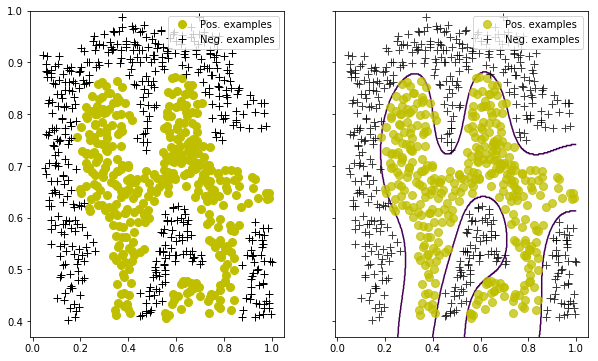

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(10,6)
ax1.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, label='Pos. examples')
ax1.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, label='Neg. examples')
ax1.legend(numpoints = 1, loc = 1)
ax1.set_xlim([-0.01, 1.05])
ax1.set_ylim([0.37, 1.16])


ax2.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, alpha=0.75, label='Pos. examples')
ax2.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, alpha=0.75, label='Neg. examples')
ax2.contour(x_0_pts, x_1_pts, z, [0])
ax2.legend(numpoints = 1, loc = 1)
ax2.set_xlim([-0.01, 1.05])
ax2.set_ylim([0.37, 1])

The task is to use the cross validation set Xval, yval to determine the
best C and σ parameter to use. 

In [20]:
X_3 = dataset_3['X']
y_3 = dataset_3['y'].reshape(-1)

X_val_3 = dataset_3['Xval']
y_val_3 = dataset_3['yval']

vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C_pts_mesh, sigma_pts_mesh = sp.meshgrid(vals, vals)
scores = sp.vstack((C_pts_mesh.ravel(), sigma_pts_mesh.ravel(), sp.zeros(len(vals)**2))).T
print('scores:\n',scores[0:9])

scores:
 [[1.e-02 1.e-02 0.e+00]
 [3.e-02 1.e-02 0.e+00]
 [1.e-01 1.e-02 0.e+00]
 [3.e-01 1.e-02 0.e+00]
 [1.e+00 1.e-02 0.e+00]
 [3.e+00 1.e-02 0.e+00]
 [1.e+01 1.e-02 0.e+00]
 [3.e+01 1.e-02 0.e+00]
 [1.e-02 3.e-02 0.e+00]]


In [21]:
for i, (C, sigma) in enumerate(scores[:, :2]):
    gamma = 1 / 2 / sigma**2
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X_3, y_3)
    scores[i, 2] = clf.score(X_val_3, y_val_3)
print('scores:\n',scores[0:9])

scores:
 [[1.00e-02 1.00e-02 4.35e-01]
 [3.00e-02 1.00e-02 4.35e-01]
 [1.00e-01 1.00e-02 4.35e-01]
 [3.00e-01 1.00e-02 4.35e-01]
 [1.00e+00 1.00e-02 6.05e-01]
 [3.00e+00 1.00e-02 6.20e-01]
 [1.00e+01 1.00e-02 6.20e-01]
 [3.00e+01 1.00e-02 6.20e-01]
 [1.00e-02 3.00e-02 4.35e-01]]


In [22]:
highest_acc_index = scores[:, 2].argmax()
C, sigma = scores[highest_acc_index][:2]
print('scores[highest_acc_index]',C, sigma)
gamma = 1 / 2 / sigma**2
clf = SVC(C=C, gamma=gamma, kernel='rbf')
clf.fit(X_3, y_3)

scores[highest_acc_index] 1.0 0.1


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
x_0_pts, x_1_pts = sp.linspace(-0.64, 0.35, 500), sp.linspace(-0.8, 0.65, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

(-0.7, 0.8)

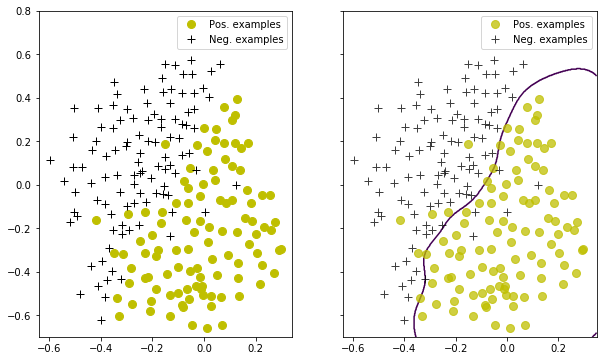

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(10,6)
ax1.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, label='Pos. examples')
ax1.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, label='Neg. examples')
ax1.legend(numpoints = 1, loc = 1)
ax1.set_ylim([-0.7, 0.8])

ax2.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, alpha=0.75, label='Pos. examples')
ax2.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, alpha=0.75, label='Neg. examples')
ax2.contour(x_0_pts, x_1_pts, z, [0])
ax2.legend(numpoints = 1, loc = 1)
ax2.set_ylim([-0.7, 0.8])
